In [71]:
# Fix imports when running from notebooks/ folder
import sys
from pathlib import Path

project_root = Path.cwd().parent 
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Added to path: {project_root}")

%load_ext autoreload
%autoreload 2

Added to path: /Users/elshaday/DEV/10Academy/fraud-detection-week-5-and-6
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import src.data.loader as loader 
import src.data.preprocessor as preprocessor
from scripts.constants import RAW_CREDIT_CARD_DATA_FILE_NAME, Credit_Card_Data_Columns, CLEAN_CREDIT_CARD_DATA_FILE_NAME
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
data_loader = loader.DataLoader()
raw_credit_card_df = data_loader.load_csv(file_name=RAW_CREDIT_CARD_DATA_FILE_NAME)

Loaded ../data/raw/credit_card.csv to dataframe!


In [74]:
print("Basic Data Info:")
raw_credit_card_df.info()

print("\nStatistical Info:")
print(tabulate(raw_credit_card_df.describe(), headers="keys", tablefmt="grid"))

Basic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float6

### Initial Fraud Data Analysis

##### General
1. No Null Values Seen on the data

##### Numeric Values
1. Amount
    - Has a mean value of 88.3 and a median(50%) value of 22. This shows the data is right skewed on this feature



In [75]:
# Clean Data
data_preprocessor = preprocessor.CreditCardDataProcessor(raw_credit_card_df)
clean_credit_card_data = data_preprocessor.get_cleaned_data()

No missing values in data
Dropped 1081 duplicated rows.


#### Class Imbalance

Fraud vs Non Fraud Transactions
Class
0    283253
1       473
Name: count, dtype: int64


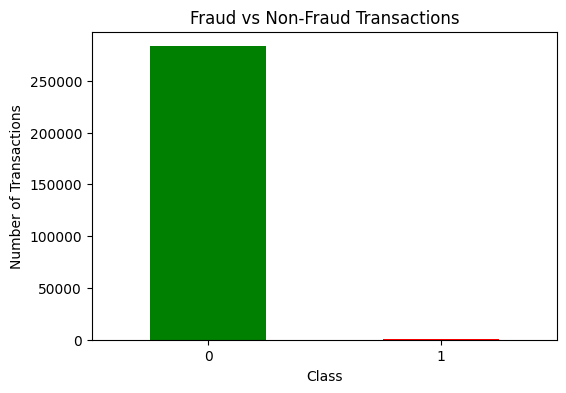

In [76]:
print("Fraud vs Non Fraud Transactions")

fraud_counts = clean_credit_card_data[
    Credit_Card_Data_Columns.CLASS.value
].value_counts()
print(fraud_counts)

fraud_counts.plot(kind="bar", color=["green", "red"], legend=False, figsize=(6, 4))
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks(rotation=0)
plt.show()

#### Univariate Analysis

Amount Distribution


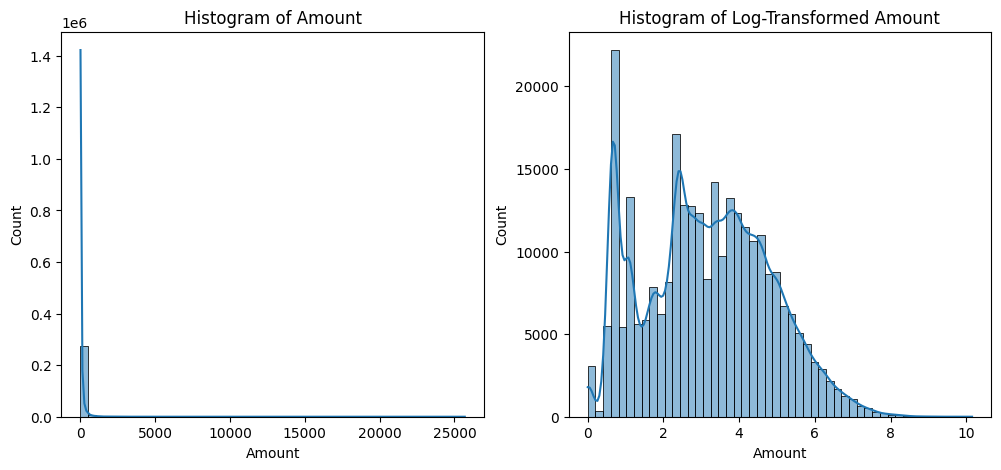

In [77]:
print("Amount Distribution")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(
    clean_credit_card_data[Credit_Card_Data_Columns.AMOUNT.value], bins=50, kde=True
)
plt.title("Histogram of Amount")


plt.subplot(1, 2, 2)
sns.histplot(
    np.log1p(clean_credit_card_data[Credit_Card_Data_Columns.AMOUNT.value]),
    bins=50,
    kde=True,
)
plt.title("Histogram of Log-Transformed Amount")
plt.show()

Time Distribution


Text(0.5, 1.0, 'Histogram of Time')

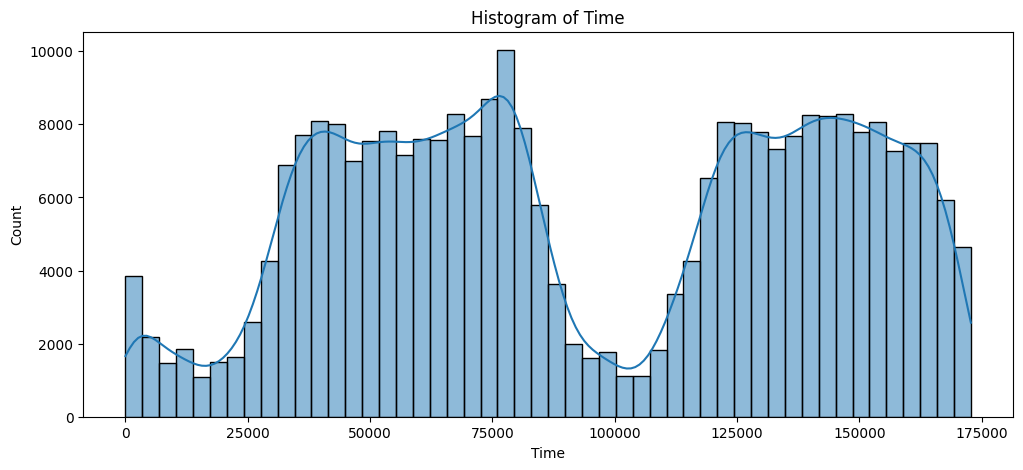

In [78]:
print("Time Distribution")

plt.figure(figsize=(12, 5))
sns.histplot(
    clean_credit_card_data[Credit_Card_Data_Columns.TIME.value], bins=50, kde=True
)
plt.title("Histogram of Time")

#### Bivariate Analysis

In [79]:
fraud_corr = clean_credit_card_data.corr()[
    Credit_Card_Data_Columns.CLASS.value
].sort_values()

Distributions of Amount and Time by class


Text(0.5, 1.0, 'Distributions of Amount and Time by class')

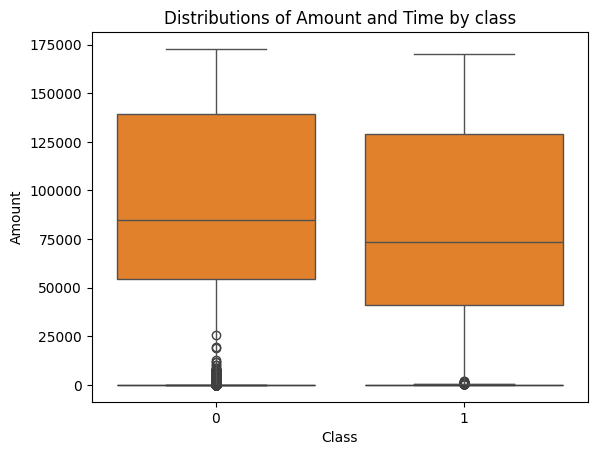

In [80]:
print("Distributions of Amount and Time by class")
sns.boxplot(x="Class", y="Amount", data=clean_credit_card_data)
sns.boxplot(x="Class", y="Time", data=clean_credit_card_data)
plt.title("Distributions of Amount and Time by class")

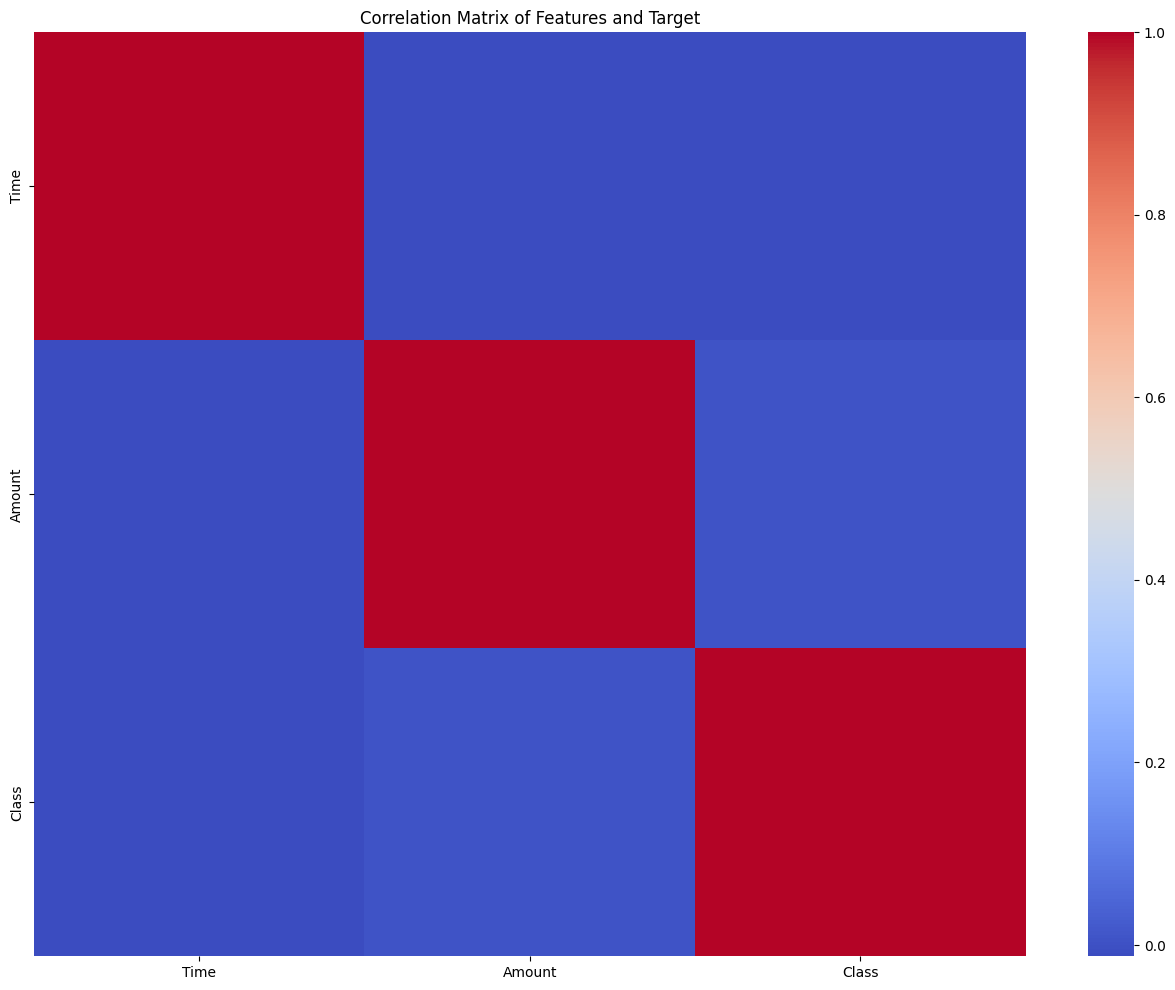

In [82]:
corr_matrix = clean_credit_card_data[
    [
        Credit_Card_Data_Columns.TIME.value,
        Credit_Card_Data_Columns.AMOUNT.value,
        Credit_Card_Data_Columns.CLASS.value,
    ]
].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features and Target")
plt.show()

In [83]:
# Save Clean Credit Card Data

data_loader.save_csv(clean_credit_card_data, file_name=CLEAN_CREDIT_CARD_DATA_FILE_NAME)

Saved dataframe to ../data/processed/credit_card_clean.csv to successfully!
